<a href="https://colab.research.google.com/github/vornitier/experiments/blob/main/conf_interval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy scipy matplotlib sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


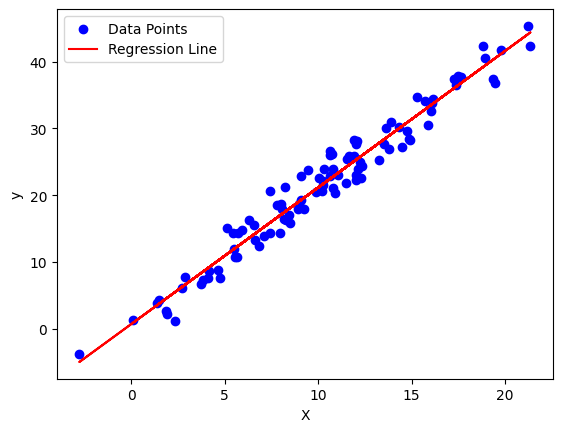

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats

# Generate synthetic data
np.random.seed(0)
X = np.random.normal(10, 5, 100).reshape(-1, 1)  # Features
y = 2 * X.squeeze() + 1 + np.random.normal(0, 2, 100)  # Target variable with some noise

# Fit a simple linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict y values
y_pred = model.predict(X)

# Plot
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


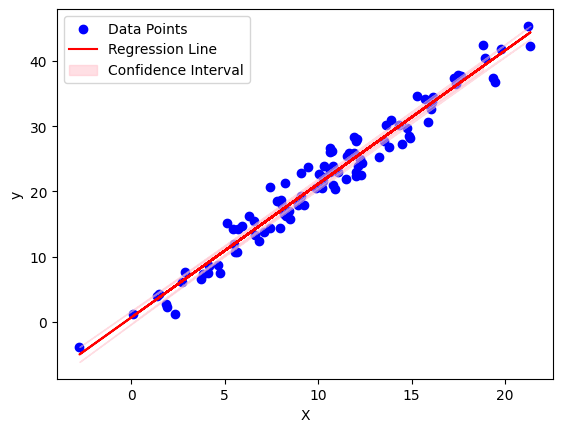

In [6]:
# Get standard deviation of y_pred
sum_errs = np.sum((y - y_pred) ** 2)
stdev = np.sqrt(1 / (len(y) - 2) * sum_errs)

# Get interval from the standard deviation
t = stats.t.ppf(0.975, len(X) - 2)
ci = t * stdev * np.sqrt(1/len(X) + (X - np.mean(X)) ** 2 / np.sum((X - np.mean(X)) ** 2))

# Ensure X, y_pred, and ci are 1D
X_1d = X.squeeze()
y_pred_1d = y_pred.flatten()
ci_1d = ci.flatten()

plt.scatter(X_1d, y, color='blue', label='Data Points')
plt.plot(X_1d, y_pred_1d, color='red', label='Regression Line')
plt.fill_between(X_1d, y_pred_1d-ci_1d, y_pred_1d+ci_1d, color='pink', alpha=0.5, label='Confidence Interval')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


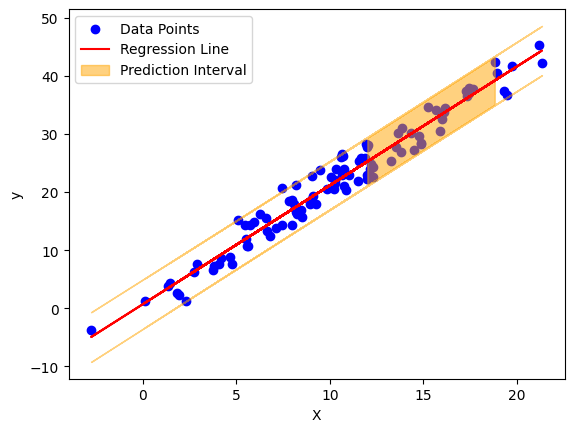

In [7]:
# Prediction interval
pi = t * stdev * np.sqrt(1 + 1/len(X) + (X - np.mean(X)) ** 2 / np.sum((X - np.mean(X)) ** 2))

# Ensure X, y_pred, and pi are 1D
X_1d = X.squeeze()
y_pred_1d = y_pred.flatten()
pi_1d = pi.flatten()

plt.scatter(X_1d, y, color='blue', label='Data Points')
plt.plot(X_1d, y_pred_1d, color='red', label='Regression Line')
plt.fill_between(X_1d, y_pred_1d-pi_1d, y_pred_1d+pi_1d, color='orange', alpha=0.5, label='Prediction Interval')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()